In [277]:
import pandas as pd
import numpy as np
from datetime import datetime
import requests
import json
import matplotlib.dates as dates
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from math import sqrt
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV

## Load in currently mined data-set

In [300]:
#load this line for the training-data that includes the vector columns
#mined_df = pd.read_csv('data/FLO_data_miner-changeVectors.csv', index_col=0)
#load this line for current data
mined_df = pd.read_csv('data/FLO_data_miner.csv', index_col=0)
#mined_df.timestamp = pd.to_datetime(mined_df.timestamp)

In [301]:
# bouncing out some raw data for Devon to play with
# devon_df = mined_df[['FLOlast', 'scrypt_price', 'scrypt_avail', 'scrypt_rented', 'scrypt_last30']]
# devon_df.to_csv('data/for_devon.csv')

#conforming the input dataframe to prep for training
mined_df = mined_df.reset_index(drop=True)
pd.set_option('display.max_columns', None)
mined_df.tail(50)

,timestamp,FLONetworkHashesPs,FLOdifficulty,FLOblocks,BTCdifficulty,BTCblocks,FLOvolume,FLOopenBuy,FLOopenSell,FLOlow,FLOhigh,FLObid,FLOask,FLObaseVol,BTCvolume,BTCopenBuy,BTCopenSell,BTClow,BTChigh,BTCbid,BTCask,BTCbaseVol,FLOlast,BTClast,scrypt_price,scrypt_avail,scrypt_rented,scrypt_last30,sha_price,sha_avail,sha_rented,sha_last30,BTChashrate
6894,2020-05-27 10:46:15.511702,7.707054e+10,957,4130413,1.513804e+13,631886.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,497.964127,5542,4118,9180.525,8699.499,9120.236,9138.997,4.415952e+06,0.000003,9120.236,0.000200,361,177,0.000241,0.000009,357,120,0.000089,9.180698e+10
6895,2020-05-27 10:51:21.274843,7.471885e+10,1109,4130420,1.513804e+13,631886.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,497.923091,5556,4121,9180.525,8699.499,9119.396,9127.168,4.415807e+06,0.000003,9119.394,0.000200,362,176,0.000241,0.000009,357,120,0.000089,9.105446e+10
6896,2020-05-27 10:56:26.496660,8.318678e+10,1176,4130437,1.513804e+13,631886.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,499.259475,5553,4115,9180.525,8699.499,9121.077,9128.458,4.428204e+06,0.000003,9115.494,0.000198,364,173,0.000241,0.000009,358,120,0.000089,9.105446e+10
6897,2020-05-27 11:01:31.528808,8.318678e+10,1176,4130437,1.513804e+13,631886.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,504.255979,5559,4112,9180.525,8699.499,9141.812,9150.948,4.474136e+06,0.000003,9151.868,0.000198,363,174,0.000241,0.000009,354,119,0.000089,9.030195e+10
6898,2020-05-27 11:06:35.723812,7.993857e+10,1171,4130451,1.513804e+13,631887.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,514.392483,5564,4106,9180.525,8699.499,9157.879,9164.172,4.567178e+06,0.000003,9157.877,0.000198,365,172,0.000241,0.000009,353,117,0.000089,9.105446e+10
6899,2020-05-27 11:11:41.223660,7.859897e+10,1130,4130454,1.513804e+13,631888.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,514.679901,5561,4107,9180.525,8699.499,9131.858,9139.934,4.569985e+06,0.000003,9139.934,0.000198,365,172,0.000241,0.000009,350,118,0.000089,9.105446e+10
6900,2020-05-27 11:16:46.443739,9.369546e+10,991,4130462,1.513804e+13,631888.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,515.436658,5560,4113,9180.525,8699.499,9127.554,9136.674,4.577157e+06,0.000003,9132.827,0.000200,366,173,0.000240,0.000009,352,118,0.000089,9.180698e+10
6901,2020-05-27 11:21:53.745828,9.323231e+10,1123,4130475,1.513804e+13,631888.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,514.277925,5562,4114,9180.525,8699.499,9131.229,9138.989,4.567043e+06,0.000003,9131.000,0.000200,365,174,0.000241,0.000009,360,123,0.000098,9.180698e+10
6902,2020-05-27 11:26:58.397717,1.107988e+11,1142,4130490,1.513804e+13,631888.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,514.103253,5567,4122,9180.525,8699.499,9134.474,9142.702,4.565590e+06,0.000003,9138.068,0.000198,366,173,0.000241,0.000009,360,123,0.000098,9.180698e+10
6903,2020-05-27 11:32:03.434339,1.173984e+11,1120,4130497,1.513804e+13,631891.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,514.878658,5569,4130,9180.525,8699.499,9135.483,9142.662,4.572753e+06,0.000003,9142.675,0.000198,368,172,0.000241,0.000009,362,123,0.000098,9.105446e+10


## Feature engineering the change vectors

In [302]:
#Calculate and store all the change vectors, then drop the colums used for calculation.
mined_df['30m_btc'] = mined_df['BTClast'].shift(periods=6)
mined_df['1h_btc'] = mined_df['BTClast'].shift(periods=12)
mined_df['1.5h_btc'] = mined_df['BTClast'].shift(periods=18)
mined_df['2h_btc'] = mined_df['BTClast'].shift(periods=24)
mined_df['2.5h_btc'] = mined_df['BTClast'].shift(periods=30)
mined_df['3h_btc'] = mined_df['BTClast'].shift(periods=36)

mined_df['30m_change'] = mined_df['BTClast'] - mined_df['30m_btc']
mined_df['1h_change'] = mined_df['BTClast'] - mined_df['1h_btc']
mined_df['1.5h_change'] = mined_df['BTClast'] - mined_df['1.5h_btc']
mined_df['2h_change'] = mined_df['BTClast'] - mined_df['2h_btc']
mined_df['2.5h_change'] = mined_df['BTClast'] - mined_df['2.5h_btc']
mined_df['3h_change'] = mined_df['BTClast'] - mined_df['3h_btc']

mined_df.drop(['30m_btc','1h_btc','1.5h_btc','2h_btc','2.5h_btc','3h_btc'], axis=1, inplace=True)
mined_df.tail(50)

,timestamp,FLONetworkHashesPs,FLOdifficulty,FLOblocks,BTCdifficulty,BTCblocks,FLOvolume,FLOopenBuy,FLOopenSell,FLOlow,FLOhigh,FLObid,FLOask,FLObaseVol,BTCvolume,BTCopenBuy,BTCopenSell,BTClow,BTChigh,BTCbid,BTCask,BTCbaseVol,FLOlast,BTClast,scrypt_price,scrypt_avail,scrypt_rented,scrypt_last30,sha_price,sha_avail,sha_rented,sha_last30,BTChashrate,30m_change,1h_change,1.5h_change,2h_change,2.5h_change,3h_change
6894,2020-05-27 10:46:15.511702,7.707054e+10,957,4130413,1.513804e+13,631886.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,497.964127,5542,4118,9180.525,8699.499,9120.236,9138.997,4.415952e+06,0.000003,9120.236,0.000200,361,177,0.000241,0.000009,357,120,0.000089,9.180698e+10,184.977,202.848,194.024,199.280,245.236,270.069
6895,2020-05-27 10:51:21.274843,7.471885e+10,1109,4130420,1.513804e+13,631886.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,497.923091,5556,4121,9180.525,8699.499,9119.396,9127.168,4.415807e+06,0.000003,9119.394,0.000200,362,176,0.000241,0.000009,357,120,0.000089,9.105446e+10,177.200,197.140,196.150,190.369,251.435,265.789
6896,2020-05-27 10:56:26.496660,8.318678e+10,1176,4130437,1.513804e+13,631886.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,499.259475,5553,4115,9180.525,8699.499,9121.077,9128.458,4.428204e+06,0.000003,9115.494,0.000198,364,173,0.000241,0.000009,358,120,0.000089,9.105446e+10,166.386,193.701,187.493,189.515,176.494,265.361
6897,2020-05-27 11:01:31.528808,8.318678e+10,1176,4130437,1.513804e+13,631886.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,504.255979,5559,4112,9180.525,8699.499,9141.812,9150.948,4.474136e+06,0.000003,9151.868,0.000198,363,174,0.000241,0.000009,354,119,0.000089,9.030195e+10,55.867,219.413,226.066,221.868,216.491,317.718
6898,2020-05-27 11:06:35.723812,7.993857e+10,1171,4130451,1.513804e+13,631887.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,514.392483,5564,4106,9180.525,8699.499,9157.879,9164.172,4.567178e+06,0.000003,9157.877,0.000198,365,172,0.000241,0.000009,353,117,0.000089,9.105446e+10,50.970,217.667,242.712,234.255,229.056,293.396
6899,2020-05-27 11:11:41.223660,7.859897e+10,1130,4130454,1.513804e+13,631888.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,514.679901,5561,4107,9180.525,8699.499,9131.858,9139.934,4.569985e+06,0.000003,9139.934,0.000198,365,172,0.000241,0.000009,350,118,0.000089,9.105446e+10,14.216,207.934,214.046,207.514,202.837,261.423
6900,2020-05-27 11:16:46.443739,9.369546e+10,991,4130462,1.513804e+13,631888.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,515.436658,5560,4113,9180.525,8699.499,9127.554,9136.674,4.577157e+06,0.000003,9132.827,0.000200,366,173,0.000240,0.000009,352,118,0.000089,9.180698e+10,12.591,197.568,215.439,206.615,211.871,257.827
6901,2020-05-27 11:21:53.745828,9.323231e+10,1123,4130475,1.513804e+13,631888.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,514.277925,5562,4114,9180.525,8699.499,9131.229,9138.989,4.567043e+06,0.000003,9131.000,0.000200,365,174,0.000241,0.000009,360,123,0.000098,9.180698e+10,11.606,188.806,208.746,207.756,201.975,263.041
6902,2020-05-27 11:26:58.397717,1.107988e+11,1142,4130490,1.513804e+13,631888.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,514.103253,5567,4122,9180.525,8699.499,9134.474,9142.702,4.565590e+06,0.000003,9138.068,0.000198,366,173,0.000241,0.000009,360,123,0.000098,9.180698e+10,22.574,188.960,216.275,210.067,212.089,199.068
6903,2020-05-27 11:32:03.434339,1.173984e+11,1120,4130497,1.513804e+13,631891.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,514.878658,5569,4130,9180.525,8699.499,9135.483,9142.662,4.572753e+06,0.000003,9142.675,0.000198,368,172,0.000241,0.000009,362,123,0.000098,9.105446e+10,-9.193,46.674,210.220,216.873,212.675,207.298


In [303]:
# Generate the target values: 5min increments means 48 rows represents 4hr of time change
mined_df['target_btc'] = mined_df['BTClast'].shift(periods=-36)
mined_df.tail(50)

,timestamp,FLONetworkHashesPs,FLOdifficulty,FLOblocks,BTCdifficulty,BTCblocks,FLOvolume,FLOopenBuy,FLOopenSell,FLOlow,FLOhigh,FLObid,FLOask,FLObaseVol,BTCvolume,BTCopenBuy,BTCopenSell,BTClow,BTChigh,BTCbid,BTCask,BTCbaseVol,FLOlast,BTClast,scrypt_price,scrypt_avail,scrypt_rented,scrypt_last30,sha_price,sha_avail,sha_rented,sha_last30,BTChashrate,30m_change,1h_change,1.5h_change,2h_change,2.5h_change,3h_change,target_btc
6894,2020-05-27 10:46:15.511702,7.707054e+10,957,4130413,1.513804e+13,631886.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,497.964127,5542,4118,9180.525,8699.499,9120.236,9138.997,4.415952e+06,0.000003,9120.236,0.000200,361,177,0.000241,0.000009,357,120,0.000089,9.180698e+10,184.977,202.848,194.024,199.280,245.236,270.069,9145.332
6895,2020-05-27 10:51:21.274843,7.471885e+10,1109,4130420,1.513804e+13,631886.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,497.923091,5556,4121,9180.525,8699.499,9119.396,9127.168,4.415807e+06,0.000003,9119.394,0.000200,362,176,0.000241,0.000009,357,120,0.000089,9.105446e+10,177.200,197.140,196.150,190.369,251.435,265.789,9141.244
6896,2020-05-27 10:56:26.496660,8.318678e+10,1176,4130437,1.513804e+13,631886.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,499.259475,5553,4115,9180.525,8699.499,9121.077,9128.458,4.428204e+06,0.000003,9115.494,0.000198,364,173,0.000241,0.000009,358,120,0.000089,9.105446e+10,166.386,193.701,187.493,189.515,176.494,265.361,9148.834
6897,2020-05-27 11:01:31.528808,8.318678e+10,1176,4130437,1.513804e+13,631886.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,504.255979,5559,4112,9180.525,8699.499,9141.812,9150.948,4.474136e+06,0.000003,9151.868,0.000198,363,174,0.000241,0.000009,354,119,0.000089,9.030195e+10,55.867,219.413,226.066,221.868,216.491,317.718,9129.458
6898,2020-05-27 11:06:35.723812,7.993857e+10,1171,4130451,1.513804e+13,631887.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,514.392483,5564,4106,9180.525,8699.499,9157.879,9164.172,4.567178e+06,0.000003,9157.877,0.000198,365,172,0.000241,0.000009,353,117,0.000089,9.105446e+10,50.970,217.667,242.712,234.255,229.056,293.396,9136.429
6899,2020-05-27 11:11:41.223660,7.859897e+10,1130,4130454,1.513804e+13,631888.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,514.679901,5561,4107,9180.525,8699.499,9131.858,9139.934,4.569985e+06,0.000003,9139.934,0.000198,365,172,0.000241,0.000009,350,118,0.000089,9.105446e+10,14.216,207.934,214.046,207.514,202.837,261.423,9129.999
6900,2020-05-27 11:16:46.443739,9.369546e+10,991,4130462,1.513804e+13,631888.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,515.436658,5560,4113,9180.525,8699.499,9127.554,9136.674,4.577157e+06,0.000003,9132.827,0.000200,366,173,0.000240,0.000009,352,118,0.000089,9.180698e+10,12.591,197.568,215.439,206.615,211.871,257.827,9146.297
6901,2020-05-27 11:21:53.745828,9.323231e+10,1123,4130475,1.513804e+13,631888.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,514.277925,5562,4114,9180.525,8699.499,9131.229,9138.989,4.567043e+06,0.000003,9131.000,0.000200,365,174,0.000241,0.000009,360,123,0.000098,9.180698e+10,11.606,188.806,208.746,207.756,201.975,263.041,9142.295
6902,2020-05-27 11:26:58.397717,1.107988e+11,1142,4130490,1.513804e+13,631888.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,514.103253,5567,4122,9180.525,8699.499,9134.474,9142.702,4.565590e+06,0.000003,9138.068,0.000198,366,173,0.000241,0.000009,360,123,0.000098,9.180698e+10,22.574,188.960,216.275,210.067,212.089,199.068,9143.173
6903,2020-05-27 11:32:03.434339,1.173984e+11,1120,4130497,1.513804e+13,631891.0,230197.603084,177,1402,0.000003,0.000003,0.000003,0.000003,0.738436,514.878658,5569,4130,9180.525,8699.499,9135.483,9142.662,4.572753e+06,0.000003,9142.675,0.000198,368,172,0.000241,0.000009,362,123,0.000098,9.105446e+10,-9.193,46.674,210.220,216.873,212.675,207.298,9147.342


In [309]:
# Slice out the data needed for training the current model
# NOTE: we don't start gathering BTC hashrate until row 1898, so that's why we set that as first slice
train_df = mined_df.iloc[(1898):mined_df.shape[0]-101, :]
train_df.tail()

,timestamp,FLONetworkHashesPs,FLOdifficulty,FLOblocks,BTCdifficulty,BTCblocks,FLOvolume,FLOopenBuy,FLOopenSell,FLOlow,FLOhigh,FLObid,FLOask,FLObaseVol,BTCvolume,BTCopenBuy,BTCopenSell,BTClow,BTChigh,BTCbid,BTCask,BTCbaseVol,FLOlast,BTClast,scrypt_price,scrypt_avail,scrypt_rented,scrypt_last30,sha_price,sha_avail,sha_rented,sha_last30,BTChashrate,30m_change,1h_change,1.5h_change,2h_change,2.5h_change,3h_change,target_btc
6838,2020-05-27 06:01:43.566197,9.477210e+10,1000,4130131,1.513804e+13,631865.0,458811.595086,192,1389,0.000003,0.000003,0.000003,0.000003,1.418421,586.739897,5455,4380,9012.831,8699.499,8879.057,8881.758,5.198097e+06,0.000003,8879.058,0.0002,366,164,0.000279,0.000009,339,126,0.00002,8.954943e+10,8.928,19.504,48.021,53.028,48.925,67.928,8923.622
6839,2020-05-27 06:06:48.273076,9.477210e+10,1000,4130131,1.513804e+13,631865.0,458811.595086,191,1390,0.000003,0.000003,0.000003,0.000003,1.418421,588.164033,5454,4381,9012.831,8699.499,8851.473,8858.206,5.210679e+06,0.000003,8858.205,0.0002,364,165,0.000279,0.000009,342,127,0.00002,8.954943e+10,-18.606,-2.937,20.382,13.617,22.431,27.071,8932.420
6840,2020-05-27 06:11:53.341158,1.020265e+11,1052,4130148,1.513804e+13,631865.0,459139.812259,190,1389,0.000003,0.000003,0.000003,0.000003,1.419465,588.068485,5453,4380,9012.831,8699.499,8851.451,8857.104,5.209824e+06,0.000003,8860.487,0.0002,363,165,0.000279,0.000009,342,127,0.00002,8.954943e+10,-0.079,7.926,20.682,19.735,23.722,24.688,8926.212
6841,2020-05-27 06:16:59.338616,9.808997e+10,1012,4130158,1.513804e+13,631865.0,459139.812259,191,1390,0.000003,0.000003,0.000003,0.000003,1.419465,587.201966,5450,4383,9012.831,8699.499,8851.094,8858.311,5.202081e+06,0.000003,8856.433,0.0002,361,166,0.000278,0.000009,343,126,0.00002,8.954943e+10,-3.882,-4.526,21.596,15.519,11.309,28.214,8923.244
6842,2020-05-27 06:22:03.629555,9.592043e+10,1154,4130165,1.513804e+13,631867.0,459139.812259,189,1391,0.000003,0.000003,0.000003,0.000003,1.419465,586.012327,5456,4380,9012.831,8699.499,8851.001,8856.517,5.191456e+06,0.000003,8855.624,0.0002,361,167,0.000276,0.000009,341,128,0.00002,8.879691e+10,-13.249,-21.214,5.671,14.740,7.377,20.951,8928.001


## Splitting and fitting

In [310]:
X = train_df.drop(['timestamp', 'target_btc','FLONetworkHashesPs', 'FLOdifficulty', 'FLOblocks', 'FLOvolume', 'FLOopenBuy', 'FLOopenSell', 'FLOlow', 'FLOhigh', 'FLObid', 'FLOask', 'FLObaseVol', 'FLOlast'], axis=1)
y = train_df['target_btc']

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [312]:
dum_guess = round(train_df['target_btc'].mean())
print("Base Model will guess: "+ str(dum_guess))
print("Our baseline RMSE is : " + str(round(sqrt(mean_squared_error(y, np.full(y.shape,dum_guess))))))

Base Model will guess: 9270.0
Our baseline RMSE is : 384


In [313]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_preds = lin_model.predict(X_test)

In [314]:
print("MSE : " + str(mean_squared_error(y_test, lin_preds)))
print("RMSE: " + str(sqrt(mean_squared_error(y_test, lin_preds))))

MSE : 15420.99173688686
RMSE: 124.18128577562264


In [315]:
rf_model = RandomForestRegressor(n_estimators=125,
                            max_features=5,
                            max_depth=110,
                           #random_state=0,
                            min_samples_split=10,
                            min_samples_leaf=7)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("MSE : " + str(mean_squared_error(y_test, rf_pred)))
print("RMSE: " + str(sqrt(mean_squared_error(y_test, rf_pred))))

MSE : 1187.1131990610318
RMSE: 34.45450912523688


In [316]:
model_g = GradientBoostingRegressor(learning_rate=0.033,
                                   n_estimators=480,
                                   min_samples_leaf=7,
                                   max_depth=89)
model_g.fit(X_train,y_train)
preds_gb = model_g.predict(X_test)
print("MSE : " + str(mean_squared_error(y_test, preds_gb)))
print("RMSE: " + str(sqrt(mean_squared_error(y_test, preds_gb))))

MSE : 1500.7056044521098
RMSE: 38.738941705370706


In [ ]:
ada_model = AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=480,
                                            #max_features=4,
                                            max_depth=89,
                                            min_samples_split=2,
                                            min_samples_leaf=7),
                            learning_rate=0.033,
                            n_estimators=480)
ada_model.fit(X_train,y_train)
ada_preds = ada_model.predict(X_test)
print("R2 Score: " + str(r2_score(y_test, ada_preds)))
print("MSE : " + str(mean_squared_error(y_test, ada_preds)))
print("RMSE: " + str(sqrt(mean_squared_error(y_test, ada_preds))))

## GRIIIID SEEEAAARCH

In [288]:
parameters = {
    'learning_rate': [0.033,0.034,0.035],
    'n_estimators':[400,410,420,430,450,460,470,480,500],
    'min_samples_leaf':[5,6,7,8],
    'max_depth':[87,88,89,90]
}
grid_search_tune = GridSearchCV(model_g, parameters, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=2, verbose=3)
grid_search_tune.fit(X_train, y_train)
print("Best parameters set:")
print(grid_search_tune.best_estimator_)

Fitting 2 folds for each of 432 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 36.5min finished


Best parameters set:
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.033, loss='ls',
                          max_depth=89, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=7, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=480,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [282]:
grid_search_tune.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.03, loss='ls',
                          max_depth=90, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# Looking at Live Predictions

In [304]:
X_l = mined_df.iloc[mined_df.shape[0]-101:mined_df.shape[0]-1, :]
X_live = X_l.drop(['timestamp', 'target_btc'], axis=1)
live_prediction = model_g.predict(X_live)

In [305]:
live_prediction

array([8904.97485707, 8904.83552938, 8908.87502942, 8905.45268666,
       8907.70463839, 8912.38746618, 8912.9324956 , 8915.65375404,
       8914.97473562, 8916.34829144, 8917.05410028, 8914.67603565,
       8915.43863368, 8914.5395525 , 8943.32291181, 8944.85980416,
       8947.03478248, 8948.05925012, 8954.57265401, 8951.56370189,
       8949.82302756, 8945.97780086, 8944.721503  , 8957.97002589,
       8945.4446279 , 8958.33691531, 8957.55265208, 8958.22929615,
       8957.88469205, 8955.3080446 , 8954.41122131, 8952.48989869,
       8953.83568056, 8955.45849575, 8954.15329081, 8952.67247468,
       8953.3572559 , 8938.70303239, 8952.9881694 , 8954.2143714 ,
       8953.30551489, 8958.83579069, 8959.78522424, 8944.80086391,
       8945.29948338, 8947.61583626, 8948.76265492, 8938.94598288,
       8926.01067584, 8919.99473419, 8918.43347718, 8932.80391926,
       8924.42688798, 8929.14630477, 8899.12416702, 8935.01955702,
       8935.00228858, 8950.04668834, 8944.39990238, 8948.34797

In [307]:
X_l['prediction'] = live_prediction
X_l.tail(100)

/Users/owenmorris/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,timestamp,FLONetworkHashesPs,FLOdifficulty,FLOblocks,BTCdifficulty,BTCblocks,FLOvolume,FLOopenBuy,FLOopenSell,FLOlow,FLOhigh,FLObid,FLOask,FLObaseVol,BTCvolume,BTCopenBuy,BTCopenSell,BTClow,BTChigh,BTCbid,BTCask,BTCbaseVol,FLOlast,BTClast,scrypt_price,scrypt_avail,scrypt_rented,scrypt_last30,sha_price,sha_avail,sha_rented,sha_last30,BTChashrate,30m_change,1h_change,1.5h_change,2h_change,2.5h_change,3h_change,target_btc,prediction
6843,2020-05-27 06:27:08.067393,9.324697e+10,1058,4130168,1.513804e+13,631867.0,459139.812259,189,1390,0.000003,0.000003,0.000003,0.000003,1.419465,575.492457,5457,4383,9012.831,8699.499,8851.030,8858.313,5.097756e+06,0.000003,8858.936,0.000200,361,167,0.000276,0.000009,343,128,0.000020,8.804440e+10,-16.796,-17.032,2.604,18.936,8.936,29.974,8925.802,8904.974857
6844,2020-05-27 06:32:13.028186,9.659056e+10,954,4130182,1.513804e+13,631867.0,459139.812259,190,1390,0.000003,0.000003,0.000003,0.000003,1.419465,574.528485,5457,4382,9012.831,8699.499,8845.805,8853.101,5.089178e+06,0.000003,8856.144,0.000201,363,166,0.000276,0.000009,345,128,0.000020,8.954943e+10,-22.914,-13.986,-3.410,25.107,30.114,26.011,8915.165,8904.835529
6845,2020-05-27 06:37:17.537879,9.971262e+10,1153,4130191,1.513804e+13,631867.0,459139.812259,190,1391,0.000003,0.000003,0.000003,0.000003,1.419465,574.403955,5455,4379,9012.831,8699.499,8842.204,8851.040,5.088062e+06,0.000003,8838.803,0.000199,363,166,0.000274,0.000009,339,130,0.000012,8.954943e+10,-19.402,-38.008,-22.339,0.980,-5.785,3.029,8925.888,8908.875029
6846,2020-05-27 06:42:22.149795,9.965576e+10,1178,4130192,1.513804e+13,631867.0,459139.812259,190,1391,0.000003,0.000003,0.000003,0.000003,1.419465,573.328807,5460,4383,9012.831,8699.499,8843.003,8849.119,5.078492e+06,0.000003,8843.638,0.000201,363,167,0.000273,0.000009,341,130,0.000012,8.879691e+10,-16.849,-16.928,-8.923,3.833,2.886,6.873,8917.388,8905.452687
6847,2020-05-27 06:47:27.509775,9.274796e+10,1203,4130193,1.513804e+13,631868.0,459139.812259,187,1391,0.000003,0.000003,0.000003,0.000003,1.419465,574.897928,5455,4381,9012.831,8699.499,8835.450,8844.282,5.092332e+06,0.000003,8837.412,0.000202,360,169,0.000273,0.000010,340,130,0.000012,8.879691e+10,-19.021,-22.903,-23.547,2.575,-3.502,-7.712,8922.254,8907.704638
6848,2020-05-27 06:52:32.113728,9.096297e+10,1072,4130197,1.513804e+13,631868.0,459139.812259,188,1391,0.000003,0.000003,0.000003,0.000003,1.419465,577.500045,5462,4382,9012.831,8699.499,8835.362,8841.144,5.115228e+06,0.000003,8836.234,0.000202,359,171,0.000271,0.000010,323,129,0.000012,8.879691e+10,-19.390,-32.639,-40.604,-13.719,-4.650,-12.013,8921.793,8912.387466
6849,2020-05-27 06:57:36.486976,9.138574e+10,1012,4130199,1.513804e+13,631869.0,459139.812259,187,1389,0.000003,0.000003,0.000003,0.000003,1.419465,576.631212,5461,4382,9012.831,8699.499,8832.235,8838.110,5.107470e+06,0.000003,8835.533,0.000202,368,171,0.000268,0.000010,322,129,0.000012,8.954943e+10,-23.403,-40.199,-40.435,-20.799,-4.467,-14.467,8932.455,8912.932496
6850,2020-05-27 07:02:42.691817,8.370453e+10,827,4130206,1.513804e+13,631869.0,459139.812259,186,1391,0.000003,0.000003,0.000003,0.000003,1.419465,576.564840,5459,4383,9012.831,8699.499,8840.378,8847.912,5.106829e+06,0.000003,8840.233,0.000202,368,171,0.000268,0.000010,335,129,0.000012,8.954943e+10,-15.911,-38.825,-29.897,-19.321,9.196,14.203,8940.210,8915.653754
6851,2020-05-27 07:07:47.141430,8.683583e+10,1088,4130219,1.513804e+13,631869.0,459139.812259,187,1389,0.000003,0.000003,0.000003,0.000003,1.419465,571.111517,5461,4384,9012.831,8699.499,8839.517,8841.731,5.058425e+06,0.000003,8842.386,0.000202,369,170,0.000268,0.000010,333,129,0.000012,9.030195e+10,3.583,-15.819,-34.425,-18.756,4.563,-2.202,8932.000,8914.974736
6852,2020-05-27 07:12:51.884131,8.654614e+10,1111,4130220,1.513804e+13,631869.0,459139.812259,186,1390,0.000003,0.000003,0.000003,0.000003,1.419465,564.664367,5456,4384,9012.831,8699.499,8834.256,8838.681,5.001177e+06,0.000003,8839.734,0.000202,366,169,0.000268,0.000010,33

In [172]:
#exporting my first batch of precitions
#X_l.to_csv('data/live_predictions1.csv')

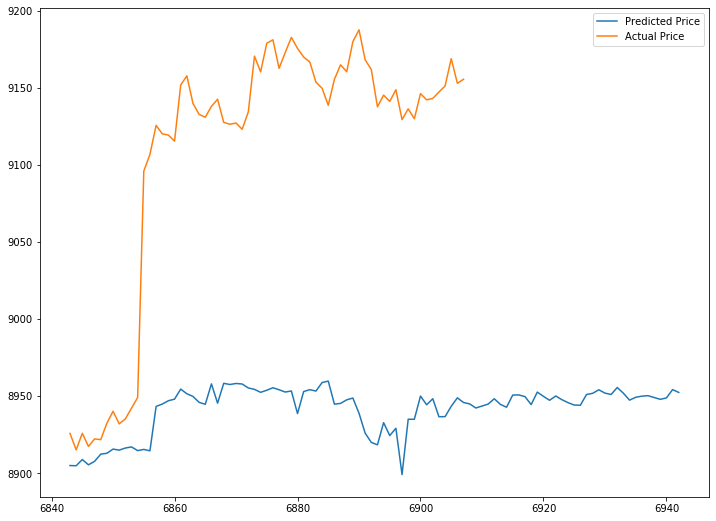

In [308]:
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(X_l['prediction'], label='Predicted Price')
ax.plot(X_l['target_btc'], label='Actual Price')
plt.legend()

In [174]:
mined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6568 entries, 0 to 6567
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           6568 non-null   object 
 1   FLONetworkHashesPs  6568 non-null   float64
 2   FLOdifficulty       6568 non-null   int64  
 3   FLOblocks           6568 non-null   int64  
 4   BTCdifficulty       6568 non-null   float64
 5   BTCblocks           6568 non-null   float64
 6   FLOvolume           6568 non-null   float64
 7   FLOopenBuy          6568 non-null   int64  
 8   FLOopenSell         6568 non-null   int64  
 9   FLOlow              6568 non-null   float64
 10  FLOhigh             6568 non-null   float64
 11  FLObid              6568 non-null   float64
 12  FLOask              6568 non-null   float64
 13  FLObaseVol          6568 non-null   float64
 14  BTCvolume           6568 non-null   float64
 15  BTCopenBuy          6568 non-null   int64  
 16  BTCope

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))
number = 1000
ax.plot(mined_df['scrypt_last30'].tail(number), label='Scrypt Last 30')
ax.plot(mined_df['scrypt_price'].tail(number), label='Scrypt Price')
plt.legend()
plt.ylim(0.00018, 0.0025)

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))
number = 1000
ax.plot(mined_df['scrypt_avail'].tail(number), label='Scrypt Last 30')
ax.plot(mined_df['scrypt_rented'].tail(number), label='Scrypt Price')
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))
number = 1000
ax.plot(mined_df['FLOlast'].tail(number), label='FLO Last 30')

In [56]:
mrr_history = pd.read_csv('data/MiningRigRentals_Account_16811_Transactions-764549c0a7b1637205321727ad3c9b36 2.csv')

In [10]:
mrr_history = mrr_history[mrr_history["type"] != "Deposit"]
mrr_history.rental_id = mrr_history.rental_id.map(lambda x : int(x)) 
mrr_history.head()

,id,time,currency,type,amount,rental_id,rigid,info
0,12941925,2020-05-24 21:37:20,BTC,Credit/Refund,2.001000e-05,2810682,114093.0,Rental: 2810682 | Rig: 114093
1,12940164,2020-05-24 17:14:34,BTC,Payment,-2.132000e-05,2810682,114093.0,Rental: 2810682 | Rig: 114093
2,12940165,2020-05-24 17:14:34,BTC,Rental Fee,-4.300000e-07,2810682,114093.0,Rental: 2810682 | Rig: 114093
3,12940159,2020-05-24 17:14:33,BTC,Payment,-8.837000e-05,2810681,65796.0,Rental: 2810681 | Rig: 65796
4,12940160,2020-05-24 17:14:33,BTC,Rental Fee,-1.770000e-06,2810681,65796.0,Rental: 2810681 | Rig: 65796


In [11]:
#Saving the read list to disk
# out_list = pd.DataFrame(mrr_history['rental_id'].unique())
# out_list.to_csv('data/rental_read_list.csv')
# out_list.info()
mrr_history.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841],
           dtype='int64', length=1832)

In [41]:
rental_id = '2810682' 
with requests.get('https://www.miningrigrentals.com/api/v2/rental/'+rental_id) as response:
    html = response.text
rig_json = json.loads(html)

In [42]:
ad_price = rig_json['data']['price']['advertised']
paid_price = rig_json['data']['price']['paid']
hash_avg = rig_json['data']['hashrate']['average']['hash']
hash_adv = rig_json['data']['hashrate']['advertised']['hash']
extend = rig_json['data']['extended']
start = rig_json['data']['start']
end = rig_json['data']['end']
price_conv = rig_json['data']['price_converted']['advertised']

In [43]:
cols = ['rental_id', 'ad_price', 'paid_price', 'hash_avg', 'hash_adv', 'extend', 'start', 'end', 'price_conv']
df = pd.DataFrame(columns=cols)
df.loc[0] = [int(rental_id), ad_price, paid_price, hash_avg, hash_adv, extend, start, end, price_conv]
df.head()

,rental_id,ad_price,paid_price,hash_avg,hash_adv,extend,start,end,price_conv
0,2810682,0.00000031,0.00002132,0.034095280482682,0.55,0,2020-05-24 21:14:34 UTC,2020-05-25 00:14:34 UTC,0.00031008


In [46]:
print(type(df.rental_id[0]))
save_list = pd.concat([mrr_history,df], axis=1, join='inner')
save_list.head(10)

<class 'int'>


,id,time,currency,type,amount,rental_id,rigid,info,rental_id,ad_price,paid_price,hash_avg,hash_adv,extend,start,end,price_conv
0,12941925,2020-05-24 21:37:20,BTC,Credit/Refund,0.00002,2810682,114093.0,Rental: 2810682 | Rig: 114093,2810682,0.00000031,0.00002132,0.034095280482682,0.55,0,2020-05-24 21:14:34 UTC,2020-05-25 00:14:34 UTC,0.00031008


In [51]:
drops = ['id', 'time', 'currency', 'type', 'amount', 'rigid', 'info']
results_df = pd.read_csv('data/mrr_outfile.csv', index_col=0).drop(drops, axis=1)
results_df.head()

,rental_id,rental_id.1,ad_price,paid_price,hash_avg,hash_adv,extend,start,end,price_conv
0,2810682,NaN,3.100000e-07,0.000021,0.034095,0.5500,0.0,2020-05-24 21:14:34 UTC,2020-05-25 00:14:34 UTC,0.000310
0,2810681,NaN,3.500000e-07,0.000088,2.119320,2.0000,0.0,2020-05-24 21:14:33 UTC,2020-05-25 00:14:33 UTC,0.000353
0,2810680,NaN,3.700000e-07,0.000017,0.375054,0.3750,0.0,2020-05-24 21:14:32 UTC,2020-05-25 00:14:32 UTC,0.000370
0,2810678,NaN,3.000000e-07,0.000022,0.612922,0.5985,0.0,2020-05-24 21:14:30 UTC,2020-05-25 00:14:30 UTC,0.000300
0,2810679,NaN,3.100000e-07,0.000109,2.936737,2.8000,0.0,2020-05-24 21:14:31 UTC,2020-05-25 00:14:31 UTC,0.000310


In [57]:
forDevon_df1 = mrr_history.merge(results_df, how='left', on='rental_id').drop('rental_id.1', axis=1)
forDevon_df1.head()

,id,time,currency,type,amount,rental_id,rigid,info,ad_price,paid_price,hash_avg,hash_adv,extend,start,end,price_conv
0,12941925,2020-05-24 21:37:20,BTC,Credit/Refund,2.001000e-05,2810682.0,114093.0,Rental: 2810682 | Rig: 114093,3.100000e-07,0.000021,0.034095,0.55,0.0,2020-05-24 21:14:34 UTC,2020-05-25 00:14:34 UTC,0.000310
1,12940164,2020-05-24 17:14:34,BTC,Payment,-2.132000e-05,2810682.0,114093.0,Rental: 2810682 | Rig: 114093,3.100000e-07,0.000021,0.034095,0.55,0.0,2020-05-24 21:14:34 UTC,2020-05-25 00:14:34 UTC,0.000310
2,12940165,2020-05-24 17:14:34,BTC,Rental Fee,-4.300000e-07,2810682.0,114093.0,Rental: 2810682 | Rig: 114093,3.100000e-07,0.000021,0.034095,0.55,0.0,2020-05-24 21:14:34 UTC,2020-05-25 00:14:34 UTC,0.000310
3,12940159,2020-05-24 17:14:33,BTC,Payment,-8.837000e-05,2810681.0,65796.0,Rental: 2810681 | Rig: 65796,3.500000e-07,0.000088,2.119320,2.00,0.0,2020-05-24 21:14:33 UTC,2020-05-25 00:14:33 UTC,0.000353
4,12940160,2020-05-24 17:14:33,BTC,Rental Fee,-1.770000e-06,2810681.0,65796.0,Rental: 2810681 | Rig: 65796,3.500000e-07,0.000088,2.119320,2.00,0.0,2020-05-24 21:14:33 UTC,2020-05-25 00:14:33 UTC,0.000353


In [58]:
forDevon_df.to_csv('data/MRR_scraped.csv')